In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier

In [2]:
# mounting drive to import the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Viewing the dataset

In [3]:
data=pd.read_csv("/content/gdrive/MyDrive/Datasets/Taiwan Bankruptcy Dataset.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Exploratory Data Analysis 1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# Summary Statistics
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Drop Net Income Flag, All observations are having same value, so this column is not carrying no information.

In [6]:
data=data.drop([' Net Income Flag'],axis=1)

In [7]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [8]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [9]:
# (Rows, Columns)
data.shape

(6819, 95)

### Checking for null values

In [10]:
data.isna().sum().sum()

0

#### There are 0 null values in the whole dataset.

### Checking the Categorical Columns

In [11]:
cat_col=[]
for i in data.columns:
  x=data[i].value_counts()
  if(len(x)<=2):
    cat_col.append(i)
  else:
    continue
cat_col  

['Bankrupt?', ' Liability-Assets Flag']

### **"Bankrupt?"**

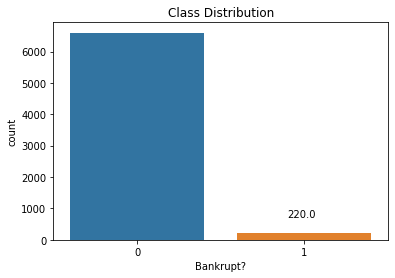

In [12]:
class_bar=sn.countplot(data=data,x="Bankrupt?")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
plt.title('Class Distribution')
class_bar

In [13]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

The '***Bankrupt?***' column, i.e., the output variable has a ***huge class imbalance***, with the minority class covering only ***3.2 %*** of the data.

### **' Liability-Assets Flag'**

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


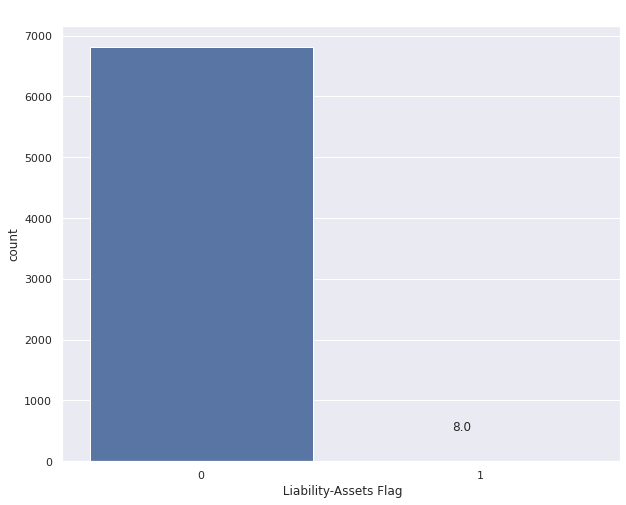

In [14]:
sn.set(rc = {'figure.figsize':(10,8)})
class_bar=sn.countplot(data=data,x=' Liability-Assets Flag')
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar
print(data[' Liability-Assets Flag'].value_counts())

In [15]:
data[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

### This feature has a very large class imbalance and we can drop this feature.

In [16]:
data.drop(columns=[' Liability-Assets Flag'],axis=1,inplace =True)
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [17]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.031506,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.030845,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.018034,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.027597,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.038375,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

## 1. Using VIF

In [18]:
y=data['Bankrupt?']
X=data.drop(columns='Bankrupt?')

In [19]:
X_transformed=X.copy()

In [20]:
#checking the shape
X_transformed.shape

(6819, 93)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[vif(X.values, i) for i in range(len(X.columns))]
vif_data.iloc[0,1]='null'
print(vif_data)

                                              feature              VIF
0    ROA(C) before interest and depreciation befor...             null
1              ROA(A) before interest and % after tax        43.595471
2    ROA(B) before interest and depreciation after...       102.894469
3                              Operating Gross Margin  52108677.951156
4                         Realized Sales Gross Margin      1076.293249
..                                                ...              ...
88                 Net Income to Stockholder's Equity         8.349085
89                                Liability to Equity       464.945077
90                 Degree of Financial Leverage (DFL)         1.004899
91   Interest Coverage Ratio (Interest expense to ...         1.006981
92                                Equity to Liability         3.045012

[93 rows x 2 columns]


In [22]:
vif_data.drop(0,inplace=True)
vif_data = vif_data.astype({'VIF':'int'})

In [23]:
# creating a df after removing columns with high VIF
vif_final=vif_data[vif_data['VIF']<5]
vif_final.reset_index(inplace=True)
vif_final=vif_final['feature']
vif_final=list(vif_final)
vif_final

[' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Reinvestment %',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Long-term fund suitability ratio (A)',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Operating profit per person',
 ' Allocation rate per person',
 ' Quick Assets/Total Assets',
 ' Cash/Total Assets',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Working Capital',
 ' Inventory/Current Liability',
 ' Long-term Liability to 

In [24]:
len(vif_final)

47

In [25]:
final_df=X[[x for x in X.columns if x in vif_final]]
final_df

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,...,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,Cash Flow to Equity,Current Liability to Current Assets,Total assets to GNP price,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1.256969e-04,0.000000e+00,7.250725e-04,0.000000,0.311664,0.017560,0.022102,0.848195,0.217535,4.980000e+09,...,4.580000e+08,0.424206,0.637555,0.458609,0.312905,0.118250,0.009219,0.026601,0.564050,0.016469
1,2.897851e-04,0.000000e+00,6.470647e-04,0.000000,0.318137,0.021144,0.022080,0.848088,0.217620,6.110000e+09,...,2.490000e+09,0.468828,0.641100,0.459001,0.314163,0.047775,0.008323,0.264577,0.570175,0.020794
2,2.361297e-04,2.550000e+07,7.900790e-04,0.000000,0.307102,0.005944,0.022760,0.848094,0.217601,7.280000e+09,...,7.610000e+08,0.276179,0.642765,0.459254,0.314515,0.025346,0.040003,0.026555,0.563706,0.016474
3,1.078888e-04,0.000000e+00,4.490449e-04,0.000000,0.321674,0.014368,0.022046,0.848005,0.217568,4.880000e+09,...,2.030000e+09,0.559144,0.579039,0.448518,0.302382,0.067250,0.003252,0.026697,0.564663,0.023982
4,7.890000e+09,0.000000e+00,6.860686e-04,0.000000,0.319162,0.029690,0.022096,0.848258,0.217626,5.510000e+09,...,8.240000e+08,0.309555,0.622374,0.454411,0.311567,0.047725,0.003878,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.510213e-04,4.500000e+09,1.790179e-04,0.113372,0.320966,0.020766,0.022374,0.848205,0.217635,7.070000e+09,...,1.077940e-04,0.400338,0.639806,0.458639,0.314063,0.027951,0.000466,0.027064,0.566193,0.029890
6815,5.220000e+09,1.440000e+09,2.370237e-04,0.371596,0.318278,0.023050,0.022159,0.848245,0.217631,5.220000e+09,...,7.710000e+09,0.096136,0.642072,0.459058,0.314446,0.031470,0.001959,0.027009,0.566018,0.038284
6816,2.509312e-04,1.039086e-04,0.000000e+00,0.490839,0.324857,0.044255,0.022068,0.847978,0.217547,5.990000e+09,...,4.074263e-04,0.055509,0.631678,0.452465,0.313353,0.007542,0.002840,0.026791,0.565158,0.097649
6817,1.236154e-04,2.510000e+09,2.110211e-04,0.181294,0.346573,0.031535,0.022350,0.854064,0.218006,7.250000e+09,...,1.165392e-04,0.246805,0.684857,0.471313,0.320118,0.022916,0.002837,0.026822,0.565302,0.044009


## 2. Using L1 Regularization


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=3.27, penalty='l1', solver='liblinear',random_state=0))
sel_.fit(X_train, np.ravel(y_train,order='C'))
sel_.get_support()

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False])

In [28]:
selected_feat_lasso = X_train.columns[(sel_.get_support())]
selected_feat_lasso

Index([' ROA(B) before interest and depreciation after tax',
       ' Operating Profit Rate', ' Tax rate (A)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Reinvestment %',
       ' Debt ratio %', ' Total Asset Turnover',
       ' Net Worth Turnover Rate (times)', ' Working Capital to Total Assets',
       ' Quick Assets/Total Assets', ' Cash/Total Assets',
       ' Current Liabilities/Liability', ' Retained Earnings to Total Assets',
       ' Fixed Assets to Assets', ' Current Liability to Liability',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets',
       ' Net Income to Total Assets'],
      dtype='object')

In [29]:
len(selected_feat_lasso)

20

## 3. Using Random Forest

In [30]:
rf = RandomForestClassifier(n_estimators=200,criterion='gini',class_weight='balanced',random_state= 21,n_jobs=-1)

In [31]:
rf.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=21)

In [32]:
imp_df = pd.DataFrame(rf.feature_importances_)
imp_df.shape

(93, 1)

In [33]:
feature_imp_df = pd.concat([pd.DataFrame(X.columns),imp_df],axis=1)
feature_imp_df.columns=['features','imp']
feature_imp_df = feature_imp_df.sort_values(by='imp',ascending=False)
feature_imp_df = feature_imp_df.head(30)

In [34]:
feature_rf= X[feature_imp_df['features']]

In [35]:
feature_list2 = feature_imp_df.features.tolist()
len(feature_list2)

30

In [36]:
feature_imp_df

,features,imp
18,Persistent EPS in the Last Four Seasons,0.056101
84,Net Income to Total Assets,0.047928
9,Continuous interest rate (after tax),0.041644
39,Borrowing dependency,0.039053
67,Retained Earnings to Total Assets,0.037066
92,Equity to Liability,0.035496
42,Net profit before tax/Paid-in capital,0.033640
36,Debt ratio %,0.030507
68,Total income/Total expense,0.025764
88,Net Income to Stockholder's Equity,0.025189


In [37]:
#pip install matplotlib --upgrade

AttributeError: ignored

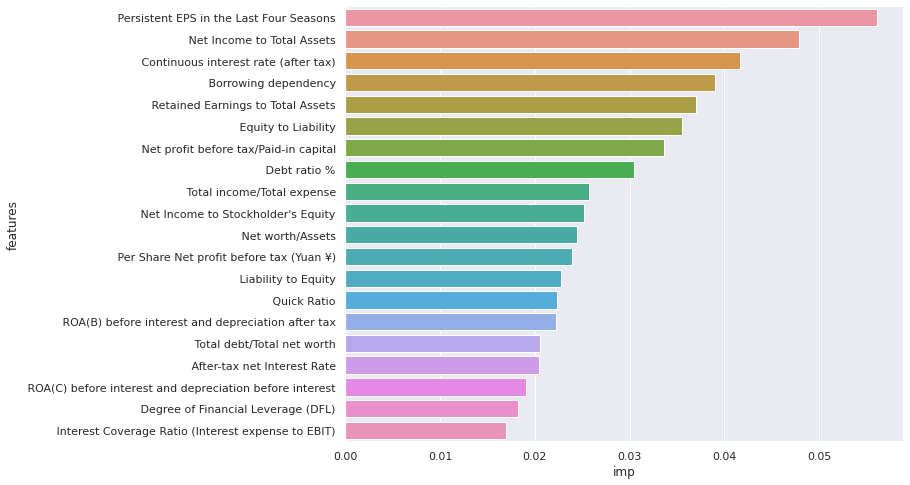

In [38]:
ax=sn.barplot(data=feature_imp_df,y=feature_imp_df['features'].head(20),x=feature_imp_df['imp'].head(20), orient='h')
for i in ax.containers:
  ax.bar_label(i,)

font1 = {'family':'serif','color':'blue','size':25}
font2 = {'family':'serif','color':'darkred','size':20}
plt.title("Feature importances using Mean Decrease in Impurity",fontdict=font1,loc='left',pad='20')
plt.xlabel("Feature Importance",fontdict=font2)  
plt.ylabel("Features",fontdict=font2)
plt.savefig("Feature Importance.png")

In [39]:
sel_ = SelectFromModel(rf,max_features=20)
sel_.fit(X_train,y_train)
sel_.get_support()

array([ True, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True])

In [40]:
selected_feat_rf= X_train.columns[(sel_.get_support())]
selected_feat_rf

Index([' ROA(C) before interest and depreciation before interest',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate',
       ' Quick Ratio', ' Total debt/Total net worth', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Liability to Equity', ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
      dtype='object')

In [41]:
len(selected_feat_rf)

20

## Combination of Lasso and Random Forest

In [42]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_1= SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=0))
sel_1.fit(X_train, np.ravel(y_train,order='C'))
sel_1.get_support()

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [43]:
selected_feat_lasso_1 = X_train.columns[(sel_1.get_support())]
selected_feat_lasso_1

Index([' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Profit Rate', ' Tax rate (A)', ' Debt ratio %',
       ' Total Asset Turnover', ' Cash/Total Assets',
       ' Current Liabilities/Liability', ' Fixed Assets to Assets',
       ' Current Liability to Liability'],
      dtype='object')

In [44]:
len(selected_feat_lasso_1)

10

In [45]:
sel_1 = SelectFromModel(rf,max_features=10)
sel_1.fit(X_train,y_train)
sel_1.get_support()

array([False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True])

In [46]:
selected_feat_rf_1= X_train.columns[(sel_1.get_support())]
selected_feat_rf_1

Index([' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Total debt/Total net worth', ' Borrowing dependency',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Equity to Liability'],
      dtype='object')

In [47]:
len(selected_feat_rf_1)

10

In [48]:
l_rf=list(selected_feat_rf_1)
l_lasso=list(selected_feat_lasso_1)

In [49]:
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [50]:
len(Union(l_rf,l_lasso))

20

In [51]:
selected_feat_combined=Union(l_rf,l_lasso)

In [52]:
X_train_lasso=X_train[selected_feat_lasso]
X_test_lasso=X_test[selected_feat_lasso]
X_train_rf=X_train[selected_feat_rf]
X_test_rf=X_test[selected_feat_rf]
X_train_comb=X_train[selected_feat_combined]
X_test_comb=X_test[selected_feat_combined]

In [53]:
summary = X[selected_feat_combined].describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Retained Earnings to Total Assets,6819.0,9.347328e-01,2.556422e-02,0.0,0.931097,0.937672,0.944811,1.000000e+00
Fixed Assets to Assets,6819.0,1.220121e+06,1.007542e+08,0.0,0.085360,0.196881,0.372200,8.320000e+09
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,0.527277,0.552278,0.584105,1.000000e+00
Net Income to Total Assets,6819.0,8.077602e-01,4.033219e-02,0.0,0.796750,0.810619,0.826455,1.000000e+00
Total income/Total expense,6819.0,2.548946e-03,1.209281e-02,0.0,0.002236,0.002336,0.002492,1.000000e+00
Net Income to Stockholder's Equity,6819.0,8.404021e-01,1.452253e-02,0.0,0.840115,0.841179,0.842357,1.000000e+00
Tax rate (A),6819.0,1.150007e-01,1.386675e-01,0.0,0.000000,0.073489,0.205841,1.000000e+00
Total Asset Turnover,6819.0,1.416056e-01,1.011450e-01,0.0,0.076462,0.118441,0.176912,1.000000e+00
Debt ratio %,6819.0,1.131771e-01,5.392031e-02,0.0,0.072891,0.111407,0.148804,1.000000e+00
Persistent EPS in the Last Four Seasons,6819.0,2.288129e-01,3.326261e-02,0.0,0.214711,0.224544,0.238820,1.000000e+00


In [54]:
summary.to_csv('summary.csv')

In [55]:
best_df = X[selected_feat_combined]

In [56]:
best_df.to_csv('best_df.csv')

# Exploratory Data Analysis 2

In [57]:
best_df.corr()

,Retained Earnings to Total Assets,Fixed Assets to Assets,ROA(B) before interest and depreciation after tax,Net Income to Total Assets,Total income/Total expense,Net Income to Stockholder's Equity,Tax rate (A),Total Asset Turnover,Debt ratio %,Persistent EPS in the Last Four Seasons,Current Liability to Liability,Cash/Total Assets,Current Liabilities/Liability,Borrowing dependency,Non-industry income and expenditure/revenue,Total debt/Total net worth,Continuous interest rate (after tax),Operating Profit Rate,ROA(A) before interest and % after tax,Equity to Liability
Retained Earnings to Total Assets,1.000000,-0.002027,0.673738,0.794189,0.020517,0.247707,0.212204,0.124320,-0.235423,0.492078,0.027070,0.096487,0.027070,-0.117913,0.021105,-0.009129,0.034777,0.021280,0.718013,0.042936
Fixed Assets to Assets,-0.002027,1.000000,-0.008364,-0.004380,-0.000429,-0.000700,-0.010045,-0.016059,0.023418,-0.006477,0.013908,-0.010716,0.013908,0.015588,-0.000355,-0.000318,-0.000016,0.000106,-0.005860,-0.007758
ROA(B) before interest and depreciation after tax,0.673738,-0.008364,1.000000,0.912040,0.024436,0.280617,0.197344,0.194810,-0.264734,0.764597,0.046694,0.227144,0.046694,-0.158618,0.022366,-0.021161,0.052261,0.035212,0.955741,0.056430
Net Income to Total Assets,0.794189,-0.004380,0.912040,1.000000,0.027065,0.328492,0.231210,0.188774,-0.281422,0.691152,0.066277,0.195652,0.066277,-0.177781,0.028423,-0.008056,0.045600,0.028482,0.961552,0.073916
Total income/Total expense,0.020517,-0.000429,0.024436,0.027065,1.000000,0.006213,-0.000944,-0.014172,-0.027995,0.023013,0.013303,-0.006558,0.013303,-0.007016,0.001701,-0.000725,0.003094,0.002047,0.028873,0.031325
Net Income to Stockholder's Equity,0.247707,-0.000700,0.280617,0.328492,0.006213,1.000000,0.077920,0.041242,-0.123986,0.222961,0.017171,0.045075,0.017171,-0.806478,0.007693,-0.000700,0.011191,0.006216,0.291744,0.029622
Tax rate (A),0.212204,-0.010045,0.197344,0.231210,-0.000944,0.077920,1.000000,0.193636,-0.009724,0.169345,0.064182,-0.011758,0.064182,-0.053177,-0.002270,-0.010497,0.020407,0.019936,0.225897,-0.053148
Total Asset Turnover,0.124320,-0.016059,0.194810,0.188774,-0.014172,0.041242,0.193636,1.000000,0.237458,0.214710,0.321993,0.108064,0.321993,-0.006443,-0.012057,-0.027847,0.027711,0.029456,0.223528,-0.198485
Debt ratio %,-0.235423,0.023418,-0.264734,-0.281422,-0.027995,-0.123986,-0.009724,0.237458,1.000000,-0.177429,-0.082322,-0.357605,-0.082322,0.329109,-0.033214,-0.054049,-0.001192,0.010397,-0.259972,-0.625879
Persistent EPS in the Last Four Seasons,0.492078,-0.006477,0.764597,0.691152,0.023013,0.222961,0.169345,0.214710,-0.177429,1.000000,0.107310,0.240956,0.107310,-0.144138,0.018148,-0.011383,0.032051,0.020420,0.764828,0.036722


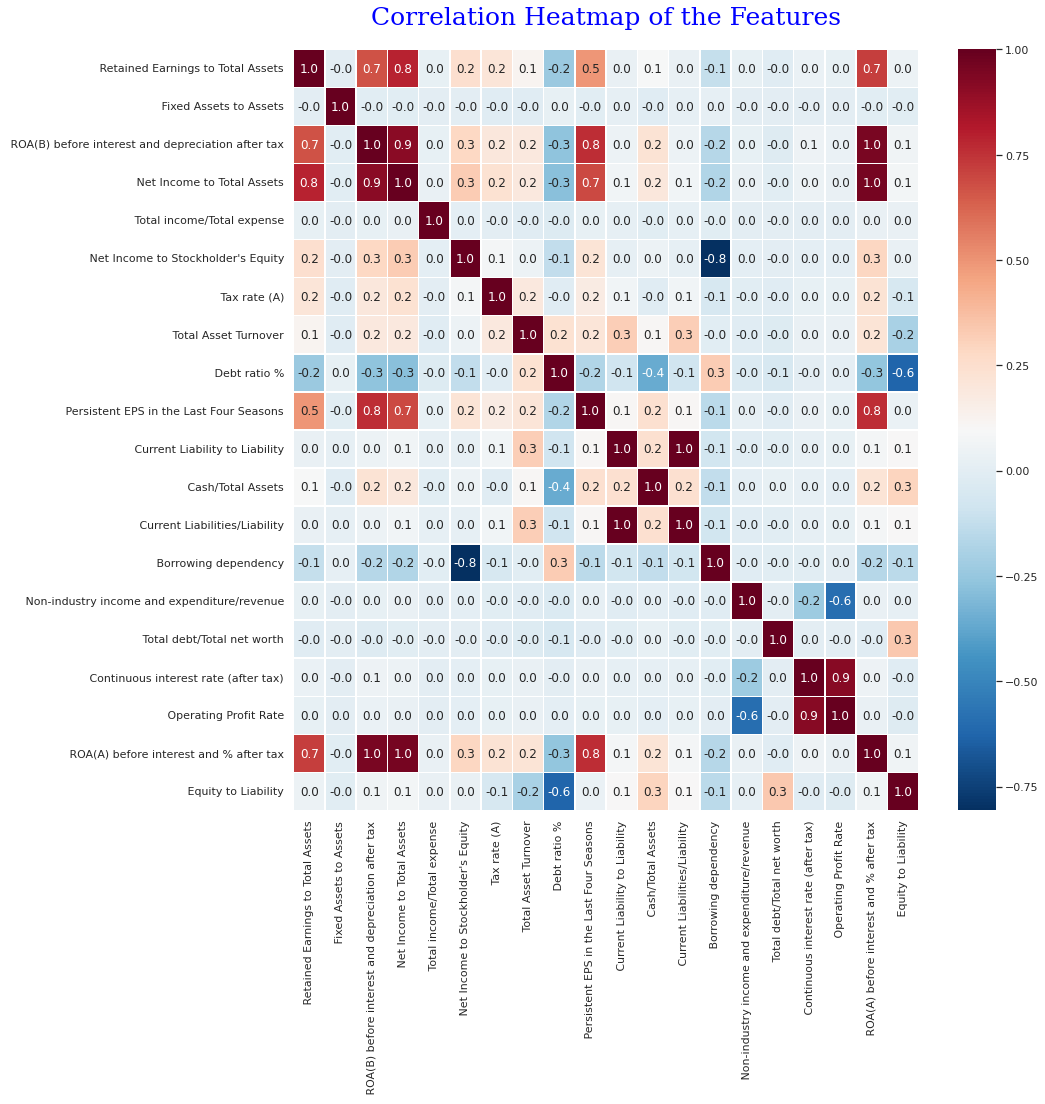

In [58]:
plt.figure(figsize=(14,14))
sn.heatmap(best_df.corr(), cmap='RdBu_r', annot=True,fmt=".1f",linewidth=.5)
font1 = {'family':'serif','color':'blue','size':25}
plt.title("Correlation Heatmap of the Features", loc='center', fontdict=font1,pad='25')
plt.savefig("Heatmap.png")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


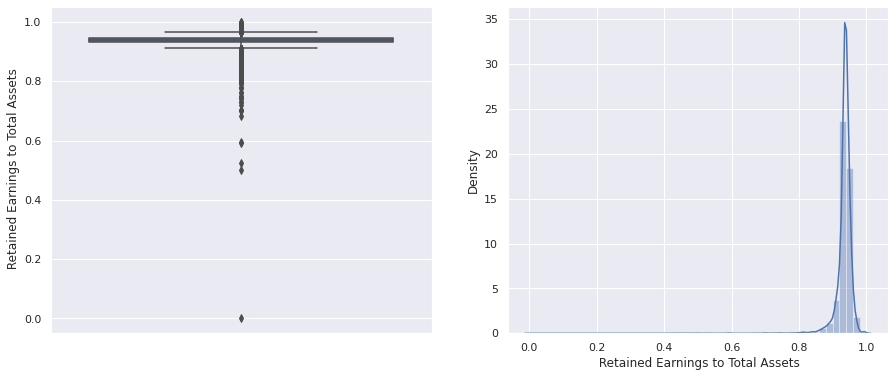

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


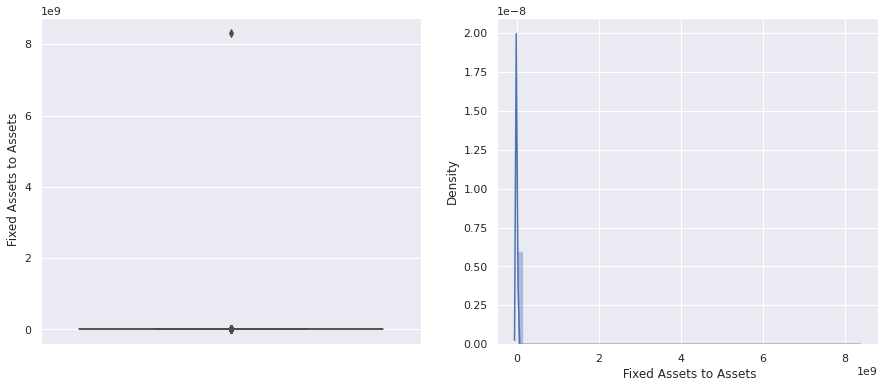

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


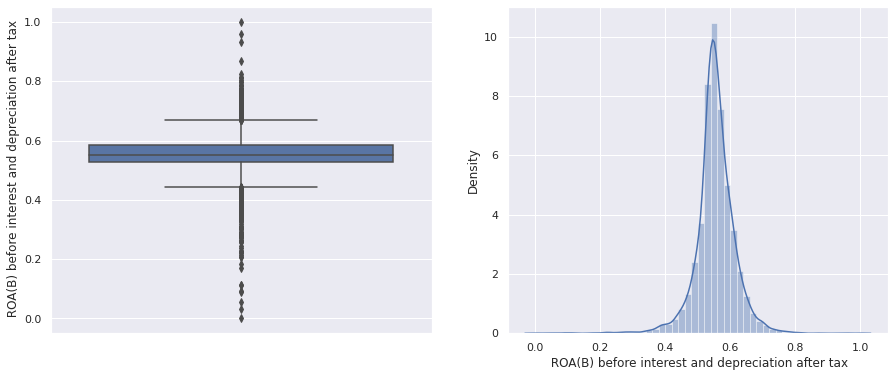

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


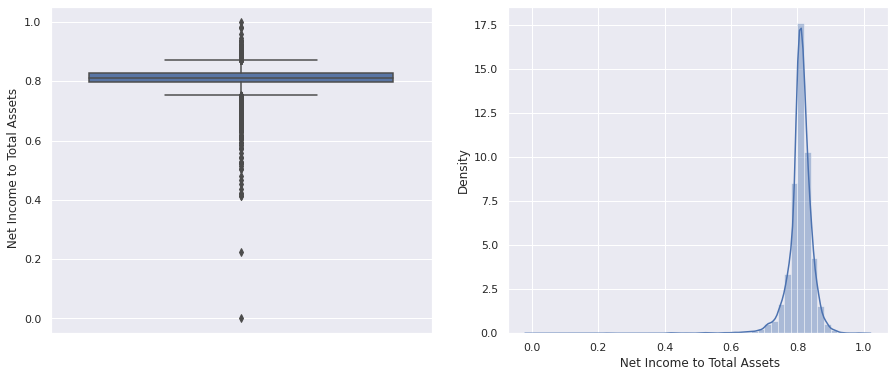

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


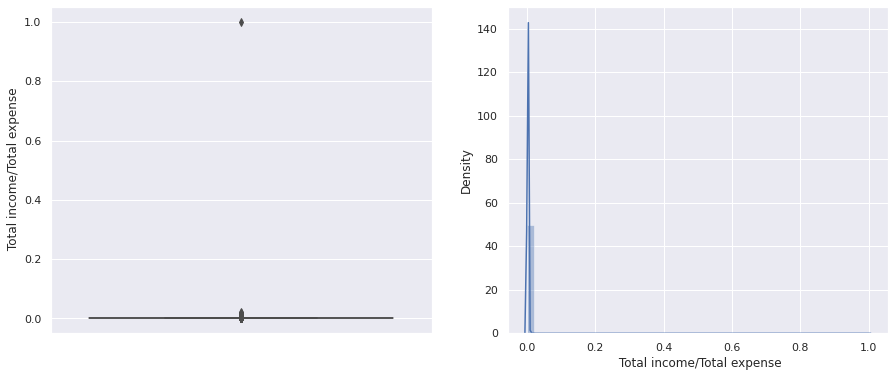

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


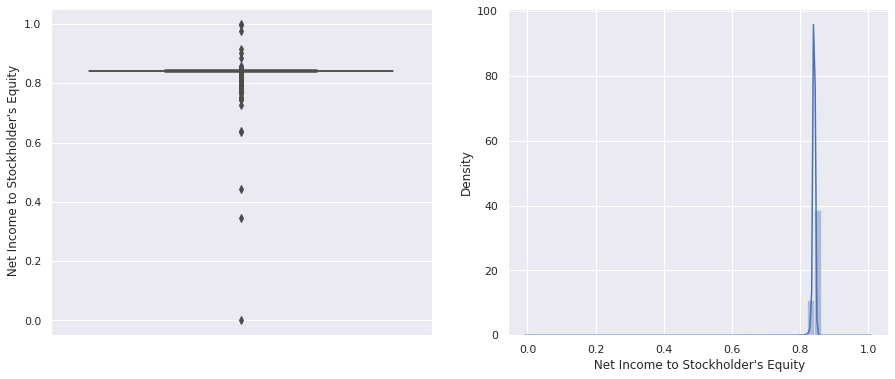

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


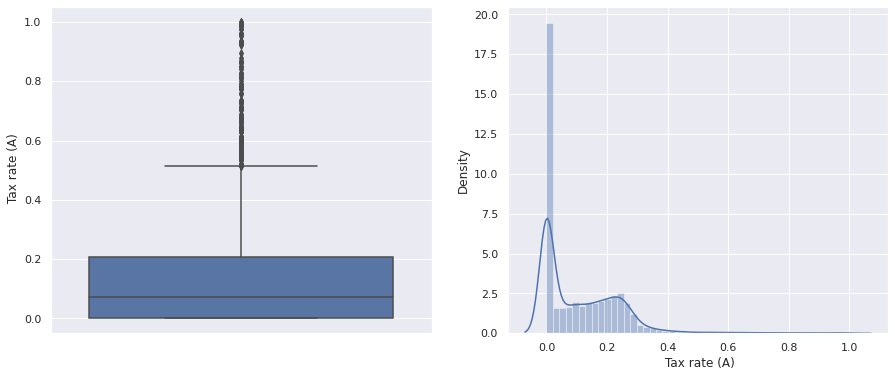

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


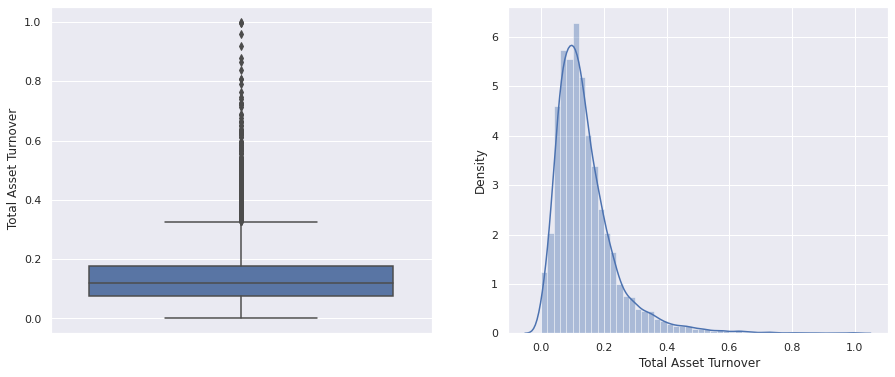

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


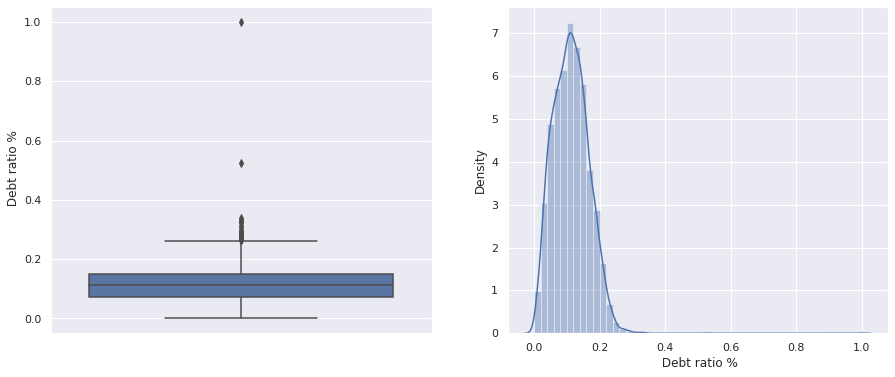

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


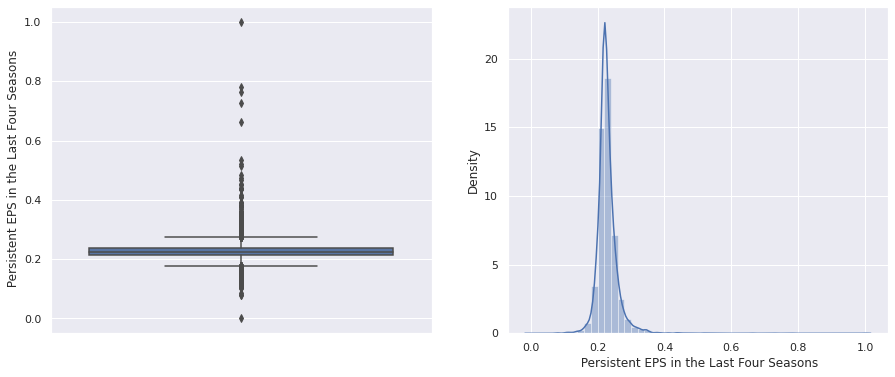

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


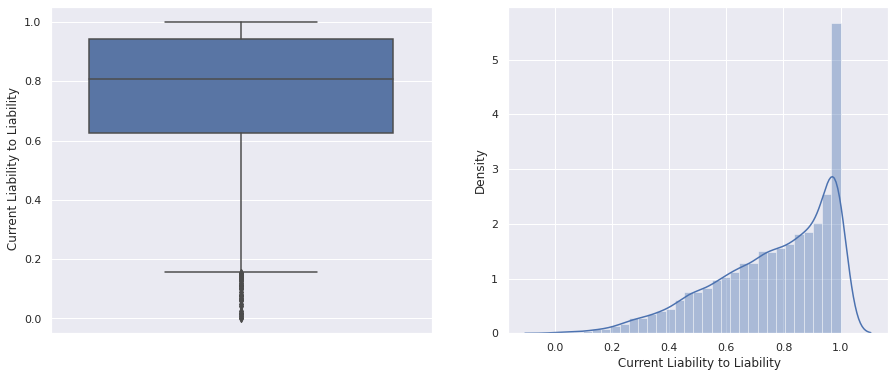

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


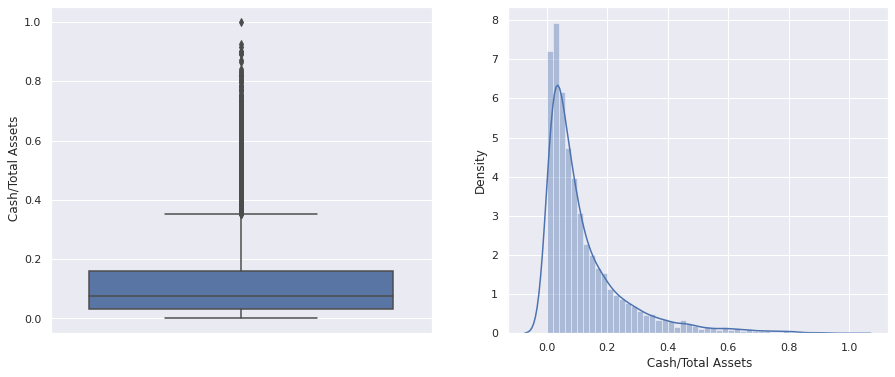

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


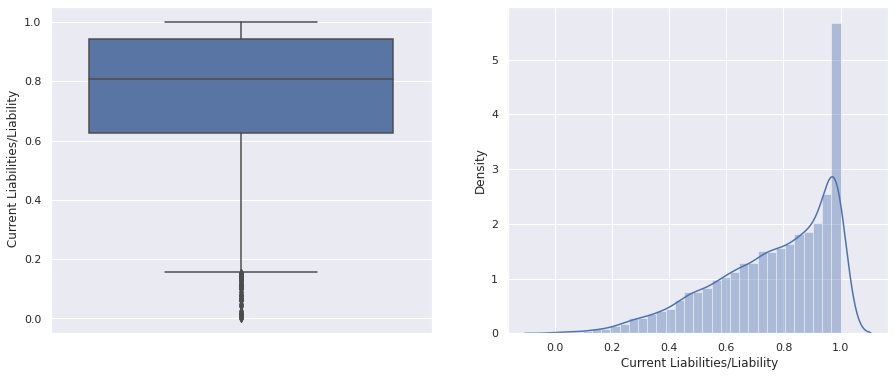

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


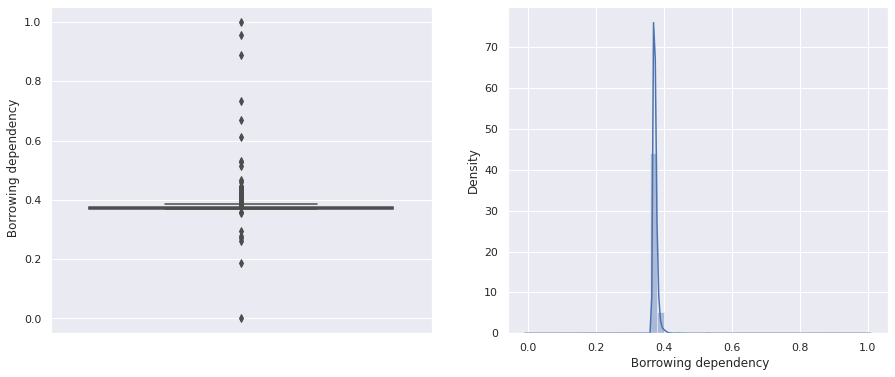

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


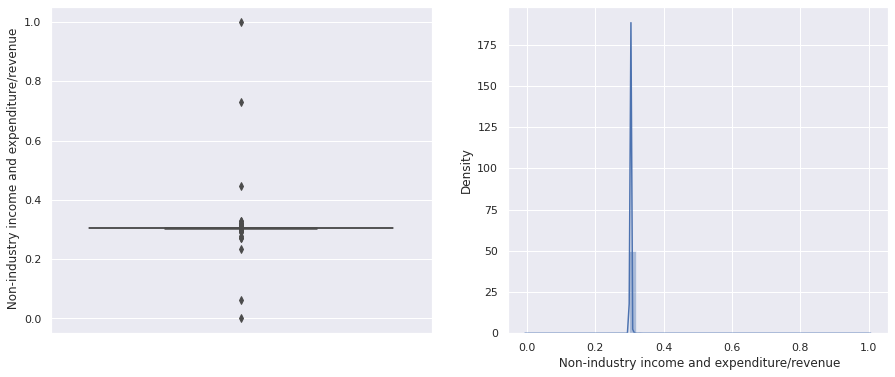

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


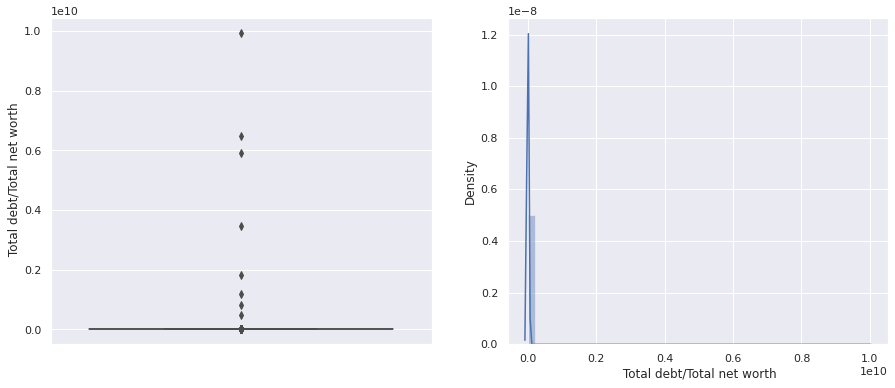

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


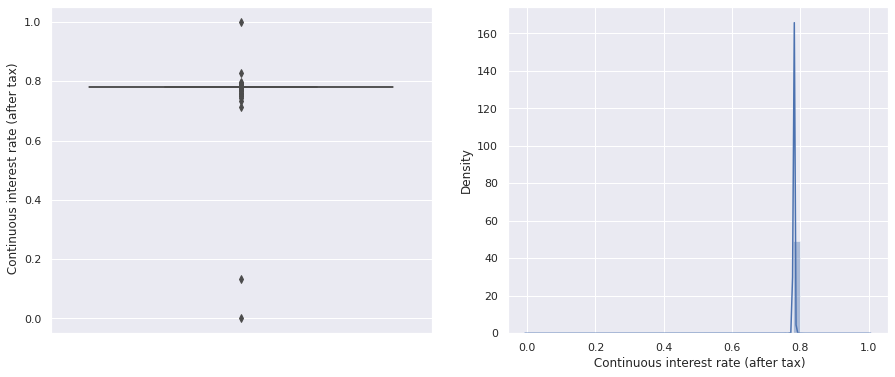

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


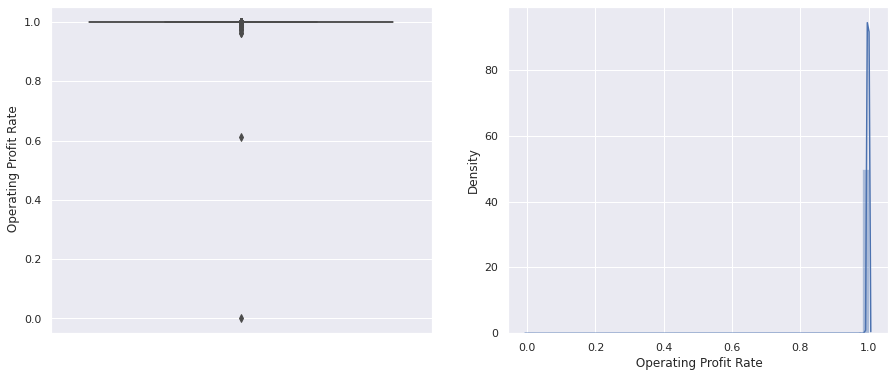

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


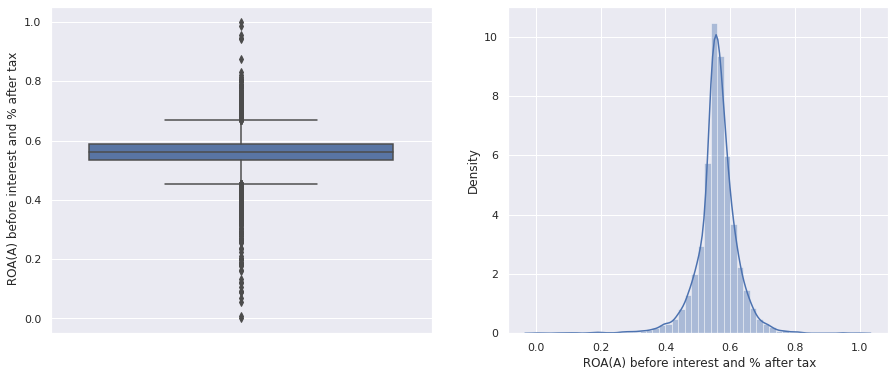

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


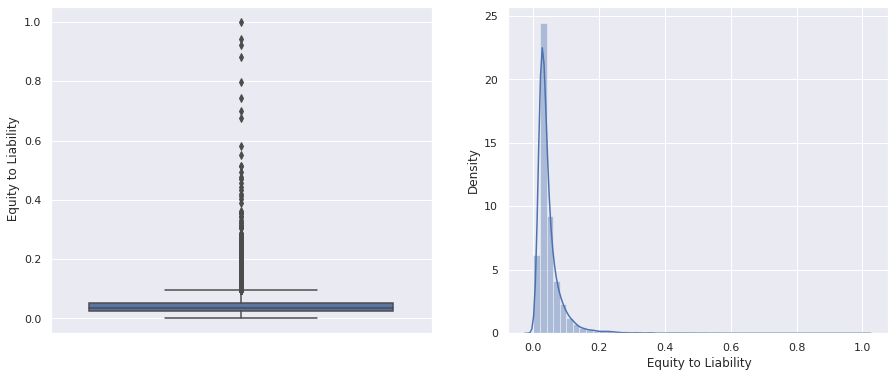

In [59]:
def plotter():
  for var in selected_feat_combined :
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sn.boxplot(y=data[var])
      fig.set_title('')
      fig.set_ylabel(var)
      
      plt.subplot(1, 2, 2)
      fig = sn.distplot(data[var].dropna())
      fig.set_xlabel(var)
      plt.savefig("")
      plt.show()

plotter()

In [60]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [61]:
#pip install autoviz

In [62]:
#from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
#AV = AutoViz_Class()

In [63]:
#data.to_csv('data.csv')

In [64]:
#df = AV.AutoViz('best_df.csv',verbose=1,lowess=True)

# Predictive Analysis

### Importing the modules

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

### Function for plotting ROC_AUC Curve

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_test, y_pred1_lasso):
    fpr, tpr, _ = roc_curve(y_test, y_pred1_lasso)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

### Logistic Regression

In [67]:
## Logistic Regression
reg_lasso = LogisticRegression(random_state=0)
reg_rf = LogisticRegression(random_state=0)
reg_comb = LogisticRegression(random_state=0)

#### Using lasso features

In [68]:
## using features extracted using lasso
reg_lasso.fit(X_train_lasso, y_train)
y_pred1_lasso = reg_lasso.predict(X_test_lasso)
log_lasso_proba=reg_lasso.predict_proba(X_test_lasso)
log_acc_lasso=round(reg_lasso.score(X_test_lasso, y_test)*100,2)
print('Accuracy of Logistic Regression Classifier on test set using features extracted using Lasso :',(reg_lasso.score(X_test_lasso, y_test)))
print('Accuracy of Logistic Regression Classifier on training set using features extracted using Lasso :',(reg_lasso.score(X_train_lasso, y_train)))

Accuracy of Logistic Regression Classifier on test set using features extracted using Lasso : 0.9649044868947134
Accuracy of Logistic Regression Classifier on training set using features extracted using Lasso : 0.9702276707530648


In [69]:
## evaluating sensitivity, specificity and ROC_AUC
conf=classification_report(y_test,y_pred1_lasso)
print(conf)
print(confusion_matrix(y_test,y_pred1_lasso))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2170
           1       0.62      0.06      0.11        81

    accuracy                           0.96      2251
   macro avg       0.80      0.53      0.55      2251
weighted avg       0.95      0.96      0.95      2251

[[2167    3]
 [  76    5]]


In [70]:
conf=classification_report(y_train,reg_lasso.predict(X_train_lasso))
print(conf)
print(confusion_matrix(y_train,reg_lasso.predict(X_train_lasso)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4429
           1       0.67      0.04      0.08       139

    accuracy                           0.97      4568
   macro avg       0.82      0.52      0.53      4568
weighted avg       0.96      0.97      0.96      4568

[[4426    3]
 [ 133    6]]


#### According to the above classfication report the following is evaluated: 


In [71]:
print("The sensitivity of the Logistic Regression Model using lasso features is: ", 0.06)
print("The specificity of the Logistic Regression Model using lasso features is: ", 1.00)

The sensitivity of the Logistic Regression Model using lasso features is:  0.06
The specificity of the Logistic Regression Model using lasso features is:  1.0


In [72]:
roc_auc_score(y_test, log_lasso_proba[:,1])

0.9342208568015019

In [73]:
roc_auc_score(y_train, reg_lasso.predict_proba(X_train_lasso)[:,1])

0.9055132051504878

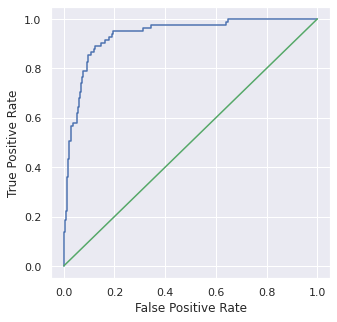

In [74]:
plot_sklearn_roc_curve(y_test,log_lasso_proba[:,1])

In [75]:
## using features extracted using random forest
reg_rf.fit(X_train_rf, y_train)
y_pred1_rf = reg_rf.predict(X_test_rf)
log_rf_proba=reg_rf.predict_proba(X_test_rf)
log_acc_rf=round(reg_rf.score(X_test_rf, y_test)*100,2)
print('Accuracy of Logistic Regression Classifier on test set using features extracted using Random Forest Importance :',(reg_rf.score(X_test_rf, y_test)))

Accuracy of Logistic Regression Classifier on test set using features extracted using Random Forest Importance : 0.964015992892048


In [76]:
## evaluating sensitivity, specificity and ROC_AUC
conf=classification_report(y_test,y_pred1_rf)
print(conf)
print(confusion_matrix(y_test,y_pred1_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2170
           1       0.00      0.00      0.00        81

    accuracy                           0.96      2251
   macro avg       0.48      0.50      0.49      2251
weighted avg       0.93      0.96      0.95      2251

[[2170    0]
 [  81    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print("The sensitivity of the Logistic Regression Model using random forest features is: ", 0.06)
print("The specificity of the Logistic Regression Model using random forest features is: ", 1.00)

The sensitivity of the Logistic Regression Model using random forest features is:  0.06
The specificity of the Logistic Regression Model using random forest features is:  1.0


In [78]:
roc_auc_score(y_test, log_rf_proba[:,1])

0.26895659099960173

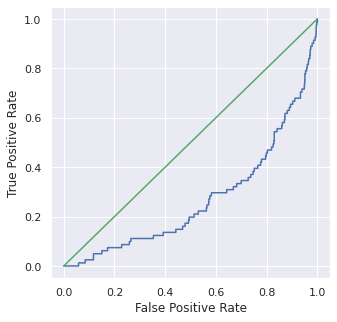

In [79]:
plot_sklearn_roc_curve(y_test,log_rf_proba[:,1])

In [80]:
## using union of featurers extracted from both Lasso and Random Forest Importance
reg_comb.fit(X_train_comb, y_train)
y_pred1_comb = reg_comb.predict(X_test_comb)
log_comb_proba=reg_comb.predict_proba(X_test_comb)
log_acc_comb=round(reg_comb.score(X_test_comb, y_test)*100,2)
print('Accuracy of Logistic Regression Classifier on test set using union of featurers extracted from both Lasso and Random Forest Importance :',(reg_comb.score(X_test_comb, y_test)))

Accuracy of Logistic Regression Classifier on test set using union of featurers extracted from both Lasso and Random Forest Importance : 0.964015992892048


In [81]:
roc_auc_score(y_test, log_comb_proba[:,1])

0.134400068271036

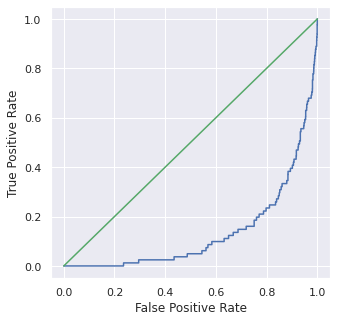

In [82]:
plot_sklearn_roc_curve(y_test,log_comb_proba[:,1])

### kNN

In [83]:
#K Nearest Neighbors 

knn_lasso = KNeighborsClassifier(n_neighbors=6)
knn_rf=KNeighborsClassifier(n_neighbors=6)
knn_comb=KNeighborsClassifier(n_neighbors=6)

## using features extracted using lasso
knn_lasso.fit(X_train_lasso, y_train)
y_pred2=knn_lasso.predict(X_test_lasso)
knn_acc_lasso=round(knn_lasso.score(X_test_lasso, y_test)*100,2)
print('Accuracy of kNN Classifier on test set with features extracted using Lasso :',(knn_lasso.score(X_test_lasso, y_test)))

## using features extracted using Random Forest
knn_rf.fit(X_train_rf, y_train)
y_pred2=knn_rf.predict(X_test_rf)
knn_acc_lasso=round(knn_rf.score(X_test_rf, y_test)*100,2)
print('Accuracy of kNN Classifier on test set with features extracted using Random Forest Importance :',(knn_rf.score(X_test_rf, y_test)))

## using union of featurers extracted from both Lasso and Random Forest Importance
knn_comb.fit(X_train_comb, y_train)
y_pred2=knn_comb.predict(X_test_comb)
knn_acc_lasso=round(knn_comb.score(X_test_comb, y_test)*100,2)
print('Accuracy of kNN Classifier on test set with union of featurers from both Lasso and Random Forest Importance :',(knn_comb.score(X_test_comb, y_test)))

Accuracy of kNN Classifier on test set with features extracted using Lasso : 0.9644602398933807
Accuracy of kNN Classifier on test set with features extracted using Random Forest Importance : 0.9649044868947134
Accuracy of kNN Classifier on test set with union of featurers from both Lasso and Random Forest Importance : 0.9649044868947134


In [84]:
roc_auc_score(y_test, knn_lasso.predict_proba(X_test_lasso)[:,1])

0.7482818455936735

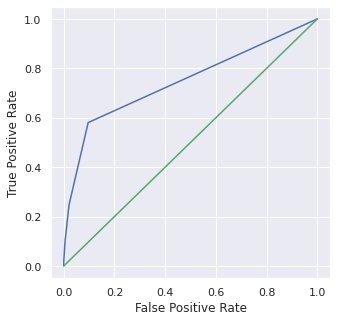

In [85]:
plot_sklearn_roc_curve(y_test,knn_lasso.predict_proba(X_test_lasso)[:,1])

In [86]:
roc_auc_score(y_test, knn_rf.predict_proba(X_test_rf)[:,1])

0.830357854013768

In [87]:
roc_auc_score(y_train, knn_rf.predict_proba(X_train_rf)[:,1])

0.9736660434578506

In [88]:
print(classification_report(y_test,knn_rf.predict(X_test_rf)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2170
           1       0.58      0.09      0.15        81

    accuracy                           0.96      2251
   macro avg       0.78      0.54      0.57      2251
weighted avg       0.95      0.96      0.95      2251



In [89]:
print(classification_report(y_train,knn_rf.predict(X_train_rf)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4429
           1       0.71      0.12      0.21       139

    accuracy                           0.97      4568
   macro avg       0.84      0.56      0.60      4568
weighted avg       0.97      0.97      0.96      4568



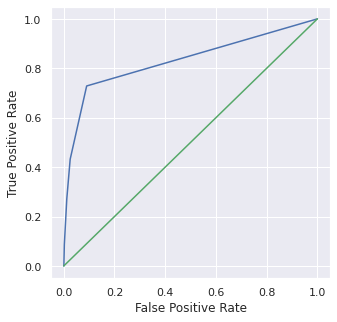

In [90]:
plot_sklearn_roc_curve(y_test,knn_rf.predict_proba(X_test_rf)[:,1])

In [91]:
roc_auc_score(y_test, knn_comb.predict_proba(X_test_comb)[:,1])

0.7655942424759629

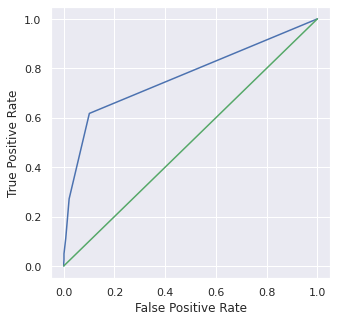

In [92]:
plot_sklearn_roc_curve(y_test, knn_comb.predict_proba(X_test_comb)[:,1])

### Decision Tree

In [93]:
#Decision Tree Classifier

dtree_lasso=DecisionTreeClassifier(random_state=0)
dtree_rf=DecisionTreeClassifier(random_state=0)
dtree_comb=DecisionTreeClassifier(random_state=0)

## using features extracted using lasso
dtree_lasso.fit(X_train_lasso,y_train)
y_pred3 = dtree_lasso.predict(X_test_lasso)
dtree_acc_lasso=round(dtree_lasso.score(X_test_lasso,y_test)*100,2)
print('Accuracy of Decision Tree Classifier on test set with features extracted using Lasso:',dtree_lasso.score(X_test_lasso, y_test))

## using features extracted using Random Forest
dtree_rf.fit(X_train_rf,y_train)
y_pred3 = dtree_rf.predict(X_test_rf)
dtree_acc_rf=round(dtree_rf.score(X_test_rf,y_test)*100,2)
print('Accuracy of Decision Tree Classifier on test set with features extracted using Random Forest Importance:',dtree_rf.score(X_test_rf, y_test))

## using union of featurers extracted from both Lasso and Random Forest Importance
dtree_comb.fit(X_train_comb,y_train)
y_pred3 = dtree_comb.predict(X_test_comb)
dtree_acc_comb=round(dtree_comb.score(X_test_comb,y_test)*100,2)
print('Accuracy of Decision Tree Classifier on test set with union of featurers from both Lasso and Random Forest Importance:',dtree_comb.score(X_test_comb, y_test))

Accuracy of Decision Tree Classifier on test set with features extracted using Lasso: 0.9480231008440693
Accuracy of Decision Tree Classifier on test set with features extracted using Random Forest Importance: 0.9551310528653931
Accuracy of Decision Tree Classifier on test set with union of featurers from both Lasso and Random Forest Importance: 0.9484673478454021


In [94]:
roc_auc_score(y_test, dtree_lasso.predict_proba(X_test_lasso)[:,1])

0.6046111395573761

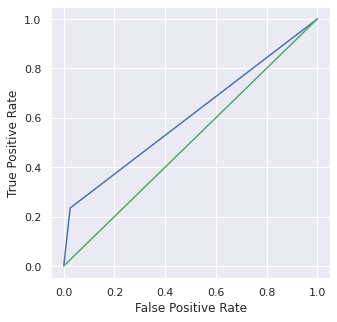

In [95]:
plot_sklearn_roc_curve(y_test,dtree_lasso.predict_proba(X_test_lasso)[:,1])

In [96]:
roc_auc_score(y_test, dtree_rf.predict_proba(X_test_rf)[:,1])

0.6380098993002219

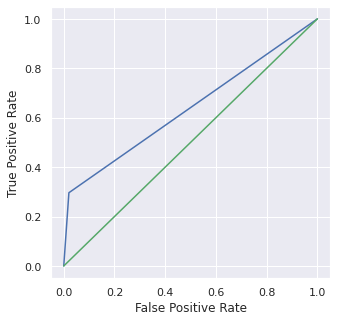

In [97]:
plot_sklearn_roc_curve(y_test, dtree_rf.predict_proba(X_test_rf)[:,1])

In [98]:
roc_auc_score(y_test, dtree_comb.predict_proba(X_test_comb)[:,1])

0.610783979063549

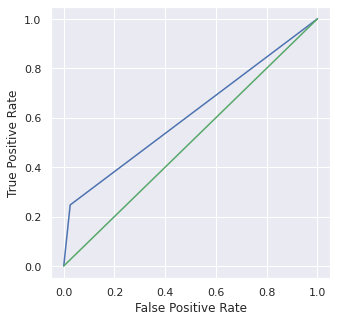

In [99]:
plot_sklearn_roc_curve(y_test,dtree_comb.predict_proba(X_test_comb)[:,1])

### Random Forest

In [100]:
#Random Forest Classifier

randomForest_lasso= RandomForestClassifier(n_estimators=100,random_state=0)
randomForest_rf= RandomForestClassifier(n_estimators=100,random_state=0)
randomForest_comb= RandomForestClassifier(n_estimators=100,random_state=0)

## using features extracted using lasso
rf_lasso=randomForest_lasso.fit(X_train_lasso,y_train)
y_pred4 = randomForest_lasso.predict(X_test_lasso)

rf_acc_lasso=round(randomForest_lasso.score(X_test_lasso,y_test)*100,2)
print('Accuracy of Random Forest Classifier on test set using features extracted using Lasso:',(randomForest_lasso.score(X_test_lasso, y_test)))

## using features extracted using Random Forest
rf_rf=randomForest_rf.fit(X_train_rf,y_train)
y_pred4 = randomForest_rf.predict(X_test_rf)
rf_acc_rf=round(randomForest_rf.score(X_test_rf,y_test)*100,2)
print('Accuracy of Random Forest Classifier on test set using features extracted using Random Forest Importance:',(randomForest_rf.score(X_test_rf, y_test)))

## using union of featurers extracted from both Lasso and Random Forest Importance
rf_comb=randomForest_comb.fit(X_train_comb,y_train)
y_pred4 = randomForest_comb.predict(X_test_comb)
rf_acc_comb=round(randomForest_comb.score(X_test_comb,y_test)*100,2)
print('Accuracy of Random Forest Classifier on test set using union of featurers extracted from both Lasso and Random Forest Importance:',(randomForest_comb.score(X_test_comb, y_test)))

Accuracy of Random Forest Classifier on test set using features extracted using Lasso: 0.9653487338960463
Accuracy of Random Forest Classifier on test set using features extracted using Random Forest Importance: 0.9680142159040427
Accuracy of Random Forest Classifier on test set using union of featurers extracted from both Lasso and Random Forest Importance: 0.965792980897379


In [101]:
roc_auc_score(y_test, randomForest_lasso.predict_proba(X_test_lasso)[:,1])

0.9207088809239348

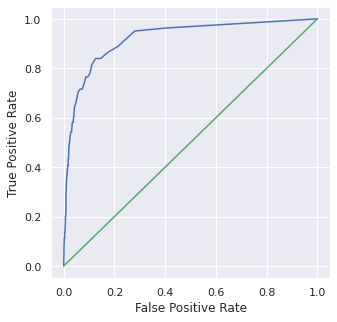

In [102]:
plot_sklearn_roc_curve(y_test,randomForest_lasso.predict_proba(X_test_lasso)[:,1])

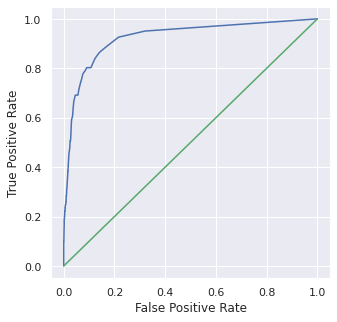

In [103]:
plot_sklearn_roc_curve(y_test,randomForest_rf.predict_proba(X_test_rf)[:,1])

In [104]:
roc_auc_score(y_test, randomForest_rf.predict_proba(X_test_rf)[:,1])

0.9238465039540308

In [105]:
roc_auc_score(y_train, randomForest_rf.predict_proba(X_train_rf)[:,1])

1.0

In [106]:
print(classification_report(y_test,randomForest_rf.predict(X_test_rf)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2170
           1       0.70      0.20      0.31        81

    accuracy                           0.97      2251
   macro avg       0.83      0.60      0.65      2251
weighted avg       0.96      0.97      0.96      2251



In [107]:
print(classification_report(y_train,randomForest_rf.predict(X_train_rf)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4429
           1       1.00      1.00      1.00       139

    accuracy                           1.00      4568
   macro avg       1.00      1.00      1.00      4568
weighted avg       1.00      1.00      1.00      4568



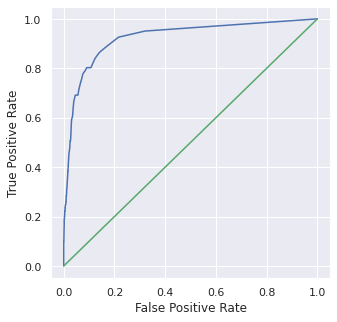

In [108]:
plot_sklearn_roc_curve(y_test,randomForest_rf.predict_proba(X_test_rf)[:,1])

In [109]:
roc_auc_score(y_test, randomForest_comb.predict_proba(X_test_comb)[:,1])

0.9207088809239347

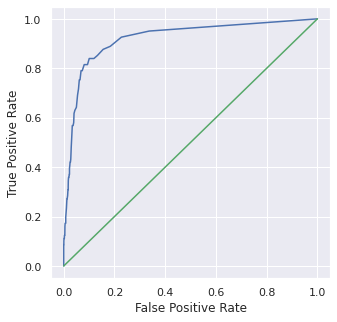

In [110]:
plot_sklearn_roc_curve(y_test, randomForest_comb.predict_proba(X_test_comb)[:,1])

### SVM

In [111]:
#SVM

svm_lasso=SVC(random_state=0,probability= True)
svm_rf=SVC(random_state=0, probability=True)
svm_comb=SVC(random_state=0, probability=True)

## using features extracted using lasso
svm_lasso.fit(X_train_lasso,y_train)
y_pred5 = svm_lasso.predict(X_test_lasso)
svm_acc_lasso=round(svm_lasso.score(X_test_lasso,y_test)*100,2)
print('Accuracy of SVM Classifier on test set using features extracted using Lasso:',(svm_lasso.score(X_test_lasso, y_test)))

## using features extracted using Random Forest
svm_rf.fit(X_train_rf,y_train)
y_pred6 = svm_rf.predict(X_test_rf)
svm_acc_rf=round(svm_rf.score(X_test_rf,y_test)*100,2)
print('Accuracy of SVM Classifier on test set using features extracted using Random Forest Importance:',(svm_rf.score(X_test_rf, y_test)))

## using union of featurers extracted from both Lasso and Random Forest Importance
svm_comb.fit(X_train_comb,y_train)
y_pred7 = svm_comb.predict(X_test_comb)
svm_acc_comb=round(svm_comb.score(X_test_comb,y_test)*100,2)
print('Accuracy of SVM Classifier on test set using union of featurers extracted from both Lasso and Random Forest Importance:',(svm_comb.score(X_test_comb, y_test)))

Accuracy of SVM Classifier on test set using features extracted using Lasso: 0.964015992892048
Accuracy of SVM Classifier on test set using features extracted using Random Forest Importance: 0.964015992892048
Accuracy of SVM Classifier on test set using union of featurers extracted from both Lasso and Random Forest Importance: 0.964015992892048


In [112]:
## evaluating sensitivity, specificity and ROC_AUC
conf=classification_report(y_test,y_pred5)
print(conf)
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2170
           1       0.00      0.00      0.00        81

    accuracy                           0.96      2251
   macro avg       0.48      0.50      0.49      2251
weighted avg       0.93      0.96      0.95      2251

[[2170    0]
 [  81    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
roc_auc_score(y_test, svm_lasso.predict_proba(X_test_lasso)[:,1])

0.8818854184445583

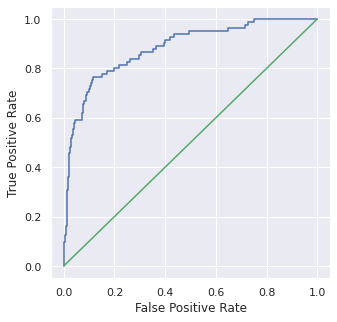

In [114]:
plot_sklearn_roc_curve(y_test,  svm_lasso.predict_proba(X_test_lasso)[:,1])

In [115]:
roc_auc_score(y_test, svm_rf.predict_proba(X_test_rf)[:,1])

0.14590942709222282

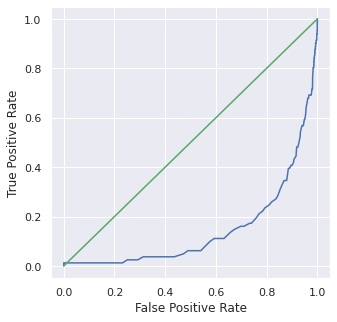

In [116]:
plot_sklearn_roc_curve(y_test, svm_rf.predict_proba(X_test_rf)[:,1])

In [117]:
roc_auc_score(y_test, svm_comb.predict_proba(X_test_comb)[:,1])

0.8515929908403028

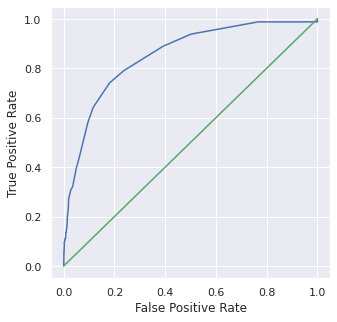

In [118]:
plot_sklearn_roc_curve(y_test, svm_comb.predict_proba(X_test_comb)[:,1])

# SMOTE

We are discarding SVM with Lasso and Random Forest selected features

Oversampling and SMOTE will be used only for logistic lasso, kNN rf, Random Forest rf and SVM comb

In [119]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [120]:
X_train_res_lasso=X_train_res[selected_feat_lasso]
X_train_res_rf=X_train_res[selected_feat_rf]
X_train_res_comb=X_train_res[selected_feat_combined]

In [121]:
reg_lasso_sm= LogisticRegression(random_state=0,max_iter=150)
knn_rf_sm=KNeighborsClassifier(n_neighbors=6)
randomForest_rf_sm= RandomForestClassifier(n_estimators=100,random_state=0)
svm_comb_sm=SVC(random_state=0, probability=True)

In [122]:
reg_lasso_sm.fit(X_train_res_lasso, y_train_res)
y_pred1_lasso_sm = reg_lasso_sm.predict(X_test_lasso)
log_lasso_proba=reg_lasso_sm.predict_proba(X_test_lasso)
log_acc_lasso=round(reg_lasso_sm.score(X_test_lasso, y_test)*100,2)
print('Accuracy of Logistic Regression Classifier on test set using features extracted using Lasso :',(reg_lasso_sm.score(X_test_lasso, y_test)))

Accuracy of Logistic Regression Classifier on test set using features extracted using Lasso : 0.8573967125721902


In [123]:
knn_rf_sm.fit(X_train_res_rf, y_train_res)
y_pred1_rf_sm = knn_rf_sm.predict(X_test_rf)
knn_rf_proba=knn_rf_sm.predict_proba(X_test_rf)
knn_acc_rf=round(knn_rf_sm.score(X_test_rf, y_test)*100,2)
print('Accuracy of kNN Classifier on test set using features extracted using random forest feature selection :',(knn_rf_sm.score(X_test_rf, y_test)))

Accuracy of kNN Classifier on test set using features extracted using random forest feature selection : 0.8867170146601511


In [124]:
svm_comb_sm.fit(X_train_res_comb, y_train_res)
y_pred1_comb_sm = svm_comb_sm.predict(X_test_comb)
svm_comb_proba=svm_comb_sm.predict_proba(X_test_comb)
svm_acc_comb=round(svm_comb_sm.score(X_test_comb, y_test)*100,2)
print('Accuracy of Random Forest Classifier on test set using features extracted using combined feature selection :',(svm_comb_sm.score(X_test_comb, y_test)))

Accuracy of Random Forest Classifier on test set using features extracted using combined feature selection : 0.964015992892048


In [125]:
conf_svm_sm= classification_report(y_test, y_pred1_comb_sm)
print(conf_svm_sm)
print(confusion_matrix(y_test,y_pred1_comb_sm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2170
           1       0.50      0.01      0.02        81

    accuracy                           0.96      2251
   macro avg       0.73      0.51      0.50      2251
weighted avg       0.95      0.96      0.95      2251

[[2169    1]
 [  80    1]]


In [126]:
randomForest_rf_sm.fit(X_train_res_rf, y_train_res)
y_pred1_rf_sm = randomForest_rf_sm.predict(X_test_rf)
randomForest_rf_proba=randomForest_rf_sm.predict_proba(X_test_rf)
randomForest_acc_rf=round(randomForest_rf_sm.score(X_test_rf, y_test)*100,2)
print('Accuracy of Random Forest Classifier on test set using features extracted using random forest feature selection :',(randomForest_rf_sm.score(X_test_rf, y_test)))

Accuracy of Random Forest Classifier on test set using features extracted using random forest feature selection : 0.9444691248334074


## Manipulation of Decision Threshold

**Logistic Regression**

In [127]:
step_factor = 0.01
threshold_value = 0.05
roc_score=0
predicted_proba = reg_lasso_sm.predict_proba(X_train_res_lasso) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_train_res, predicted))
    if roc_score<roc_auc_score(y_train_res, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_train_res, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.05 -- 0.6461955294648905
Threshold 0.060000000000000005 -- 0.6622262361706932
Threshold 0.07 -- 0.679724542786182
Threshold 0.08 -- 0.6939489726800632
Threshold 0.09 -- 0.7061413411605328
Threshold 0.09999999999999999 -- 0.7195755249491984
Threshold 0.10999999999999999 -- 0.7315421088281779
Threshold 0.11999999999999998 -- 0.7423797696997064
Threshold 0.12999999999999998 -- 0.7522013998645292
Threshold 0.13999999999999999 -- 0.7613456762248814
Threshold 0.15 -- 0.7703770602844886
Threshold 0.16 -- 0.7771505983291939
Threshold 0.17 -- 0.783472567170919
Threshold 0.18000000000000002 -- 0.7913750282230751
Threshold 0.19000000000000003 -- 0.7995032738767216
Threshold 0.20000000000000004 -- 0.806389704222172
Threshold 0.21000000000000005 -- 0.8144050575750734
Threshold 0.22000000000000006 -- 0.8210657033190335
Threshold 0.23000000000000007 -- 0.8265974260555429
Threshold 0.24000000000000007 -- 0.8317904718898171
Threshold 0.25000000000000006 -- 0.8360803793181305
Threshold 0.260

In [128]:
y_pred_lg = (reg_lasso_sm.predict_proba(X_test_lasso)[:, 1] > 0.48).astype('float')
confusion_matrix(y_test, y_pred_lg)

array([[1842,  328],
       [   8,   73]])

In [129]:
print(classification_report(y_train_res, (reg_lasso_sm.predict_proba(X_train_res_lasso)[:, 1] > 0.48).astype('float')))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      4429
           1       0.87      0.92      0.89      4429

    accuracy                           0.89      8858
   macro avg       0.89      0.89      0.89      8858
weighted avg       0.89      0.89      0.89      8858



In [130]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2170
           1       0.18      0.90      0.30        81

    accuracy                           0.85      2251
   macro avg       0.59      0.88      0.61      2251
weighted avg       0.97      0.85      0.89      2251



In [131]:
roc_auc_score(y_test,y_pred_lg)

0.8750412470842579

In [132]:
roc_auc_score(y_train_res,(reg_lasso_sm.predict_proba(X_train_res_lasso)[:, 1] > 0.48).astype('float'))

0.8863174531496952

kNN

In [133]:
step_factor = 0.01
threshold_value = 0.05
roc_score=0
predicted_proba = knn_rf_sm.predict_proba(X_train_res_rf) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_train_res, predicted))
    if roc_score<roc_auc_score(y_train_res, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_train_res, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.05 -- 0.8904944682772634
Threshold 0.060000000000000005 -- 0.8904944682772634
Threshold 0.07 -- 0.8904944682772634
Threshold 0.08 -- 0.8904944682772634
Threshold 0.09 -- 0.8904944682772634
Threshold 0.09999999999999999 -- 0.8904944682772634
Threshold 0.10999999999999999 -- 0.8904944682772634
Threshold 0.11999999999999998 -- 0.8904944682772634
Threshold 0.12999999999999998 -- 0.8904944682772634
Threshold 0.13999999999999999 -- 0.8904944682772634
Threshold 0.15 -- 0.8904944682772634
Threshold 0.16 -- 0.8904944682772634
Threshold 0.17 -- 0.9139760668322421
Threshold 0.18000000000000002 -- 0.9139760668322421
Threshold 0.19000000000000003 -- 0.9139760668322421
Threshold 0.20000000000000004 -- 0.9139760668322421
Threshold 0.21000000000000005 -- 0.9139760668322421
Threshold 0.22000000000000006 -- 0.9139760668322421
Threshold 0.23000000000000007 -- 0.9139760668322421
Threshold 0.24000000000000007 -- 0.9139760668322421
Threshold 0.25000000000000006 -- 0.9139760668322421
Threshold 0.

In [134]:
y_pred_knn = (reg_lasso_sm.predict_proba(X_test_lasso)[:, 1] > 0.67).astype('float')
confusion_matrix(y_test, y_pred_lg)

array([[1842,  328],
       [   8,   73]])

In [135]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2170
           1       0.27      0.72      0.39        81

    accuracy                           0.92      2251
   macro avg       0.63      0.82      0.67      2251
weighted avg       0.96      0.92      0.94      2251



In [136]:
print(classification_report(y_train_res,(reg_lasso_sm.predict_proba(X_train_res_lasso)[:, 1] > 0.67).astype('float')))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4429
           1       0.92      0.76      0.83      4429

    accuracy                           0.85      8858
   macro avg       0.86      0.85      0.85      8858
weighted avg       0.86      0.85      0.85      8858



In [137]:
roc_auc_score(y_test,y_pred_knn)

0.8216191614041076

In [138]:
roc_auc_score(y_train_res,reg_lasso_sm.predict_proba(X_train_res_lasso)[:, 1] > 0.67)

0.8464664709866787

**Random Forest**

In [139]:
step_factor = 0.01
threshold_value = 0.05
roc_score=0
predicted_proba = randomForest_rf_sm.predict_proba(X_train_res_rf) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_train_res, predicted))
    if roc_score<roc_auc_score(y_train_res, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_train_res, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

Threshold 0.05 -- 0.9049446827726348
Threshold 0.060000000000000005 -- 0.9241363738993
Threshold 0.07 -- 0.9241363738993
Threshold 0.08 -- 0.9320388349514563
Threshold 0.09 -- 0.9385865883946715
Threshold 0.09999999999999999 -- 0.9433280650259652
Threshold 0.10999999999999999 -- 0.9479566493565139
Threshold 0.11999999999999998 -- 0.9533754797922781
Threshold 0.12999999999999998 -- 0.9574396026191014
Threshold 0.13999999999999999 -- 0.9618424023481599
Threshold 0.15 -- 0.9651162790697674
Threshold 0.16 -- 0.9689546172951005
Threshold 0.17 -- 0.9716640325129826
Threshold 0.18000000000000002 -- 0.9761797245427861
Threshold 0.19000000000000003 -- 0.978437570557688
Threshold 0.20000000000000004 -- 0.9802438473696095
Threshold 0.21000000000000005 -- 0.9825016933845111
Threshold 0.22000000000000006 -- 0.9841950778956875
Threshold 0.23000000000000007 -- 0.9864529239105894
Threshold 0.24000000000000007 -- 0.9882592007225107
Threshold 0.25000000000000006 -- 0.9896139083314518
Threshold 0.2600000

In [140]:
y_pred_rf = ( randomForest_rf_sm.predict_proba(X_test_rf)[:, 1] > 0.42).astype('float')
confusion_matrix(y_test, y_pred_rf)

array([[2042,  128],
       [  23,   58]])

In [141]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2170
           1       0.31      0.72      0.43        81

    accuracy                           0.93      2251
   macro avg       0.65      0.83      0.70      2251
weighted avg       0.96      0.93      0.95      2251



In [142]:
print(classification_report(y_train_res, ( randomForest_rf_sm.predict_proba(X_train_res_rf)[:, 1] > 0.42).astype('float')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4429
           1       1.00      1.00      1.00      4429

    accuracy                           1.00      8858
   macro avg       1.00      1.00      1.00      8858
weighted avg       1.00      1.00      1.00      8858



In [143]:
roc_auc_score(y_train_res,randomForest_rf_sm.predict_proba(X_train_res_rf)[:, 1] > 0.42)

1.0

In [144]:
roc_auc_score(y_test,randomForest_rf_sm.predict_proba(X_test_rf)[:, 1] > 0.42)

0.828531603800421

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [146]:
#Applying XGBoost
# Number of trees
n_estimators = [50,80,100,250]
# Maximum depth of trees
max_depth = [4,6,8,12]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
clf_xgb = XGBClassifier(scale_pos_weight=102)

# random search
xg_grid = RandomizedSearchCV(clf_xgb,param_dict,cv = 5, verbose=2, scoring='roc_auc')
xg_grid.fit(X_train,y_train)
xgb_optimal_model = xg_grid.best_estimator_

xg_class_train_pred = xgb_optimal_model.predict(X_train)
xg_class_test_pred = xgb_optimal_model.predict(X_test)

xg_prob_train_pred = xgb_optimal_model.predict_proba(X_train)[:,1]
xg_prob_test_pred = xgb_optimal_model.predict_proba(X_test)[:,1]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=250; total time=   6.3s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=250; total time=   5.4s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=250; total time=   5.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=250; total time=   5.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=250; total time=   5.2s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   3.7s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   3.8s
[CV] END max_depth=12, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   3.8s
[CV] END max

# Hyperparamter Tuning

**kNN**

In [147]:
rs_space = { 'n_neighbors' : [5,6,7,8,9,10,11,12,13,14,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

rs = RandomizedSearchCV(KNeighborsClassifier(),rs_space,n_jobs=-1,cv=3)
model=rs.fit(X_train_res_rf,y_train_res)

# random random search results
print('Best random search hyperparameters are: '+str(model.best_params_))
print('Best random search score is: '+str(model.best_score_))

Best random search hyperparameters are: {'weights': 'distance', 'n_neighbors': 6, 'metric': 'minkowski'}
Best random search score is: 0.9268459402056487


In [148]:
knn_rf_sm=KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')
knn_rf_sm.fit(X_train_res_rf, y_train_res)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [149]:
knn_rf_sm.score(X_test_rf, y_test)

0.8756108396268325

In [150]:
print(classification_report(y_test,knn_rf_sm.predict(X_test_rf)))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2170
           1       0.20      0.81      0.32        81

    accuracy                           0.88      2251
   macro avg       0.60      0.85      0.63      2251
weighted avg       0.96      0.88      0.91      2251



**RF**

In [151]:
randomForest_rf_sm= RandomForestClassifier(n_estimators=225,random_state=0,criterion='entropy',max_features=15,min_samples_leaf=1,min_samples_split=2)

In [152]:
randomForest_rf_sm.fit(X_train_res_rf,y_train_res)

RandomForestClassifier(criterion='entropy', max_features=15, n_estimators=225,
                       random_state=0)

In [153]:
randomForest_rf_sm.score(X_test_rf, y_test)

0.9458018658374056